In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import io

In [2]:
data = sp.io.loadmat('data/2013_DFC_contest.mat')

In [3]:
groundtruth = np.load('groundtruth/groundtruth.npy')
groundtruth_info = np.load('groundtruth/groundtruth_info.npy',allow_pickle=True)
groundtruth_rgb = plt.imread('groundtruth/groundtruth.png')

In [23]:
groundtruth_info

array([{'class_name': 'grass_healthy', 'class_label': 1, 'class_color': array([  0, 205,   0])},
       {'class_name': 'grass_stressed', 'class_label': 2, 'class_color': array([127, 255,   0])},
       {'class_name': 'grass_synthetic', 'class_label': 3, 'class_color': array([ 46, 205,  87])},
       {'class_name': 'tree', 'class_label': 4, 'class_color': array([  0, 139,   0])},
       {'class_name': 'soil', 'class_label': 5, 'class_color': array([160,  82,  45])},
       {'class_name': 'water', 'class_label': 6, 'class_color': array([  0, 255, 255])},
       {'class_name': 'residential', 'class_label': 7, 'class_color': array([255, 255, 255])},
       {'class_name': 'commercial', 'class_label': 8, 'class_color': array([216, 191, 216])},
       {'class_name': 'road', 'class_label': 9, 'class_color': array([255,   0,   0])},
       {'class_name': 'highway', 'class_label': 10, 'class_color': array([139,   0,   0])},
       {'class_name': 'railway', 'class_label': 11, 'class_color': array

In [25]:
lidar = data['lidar']
print("L'image LiDAR est composée de %d lignes et %d colonnes "%(lidar.shape)+"au format %s"%lidar.dtype)
hsi_raw = data['hyper']
print("L'image hyperspectrale est composée de %d lignes, %d colonnes et %d bandes "%(hsi_raw.shape)
      +"au format %s"%hsi_raw.dtype)

L'image LiDAR est composée de 349 lignes et 1905 colonnes au format float32
L'image hyperspectrale est composée de 349 lignes, 1905 colonnes et 144 bandes au format uint16


In [35]:
r,c,N = hsi_raw.shape
hsi = hsi_raw.reshape(r*c,N)
x_train = hsi_raw[groundtruth != 0]
y_train = groundtruth[groundtruth != 0]
x_train.shape, y_train.shape

((2832, 144), (2832,))

In [45]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state=1, max_iter=10000)
classifier = classifier.fit(x_train, y_train)
prediction = classifier.predict(hsi)

/nix/store/wr9lpvp213kzycl4drl7frd5b741p31b-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


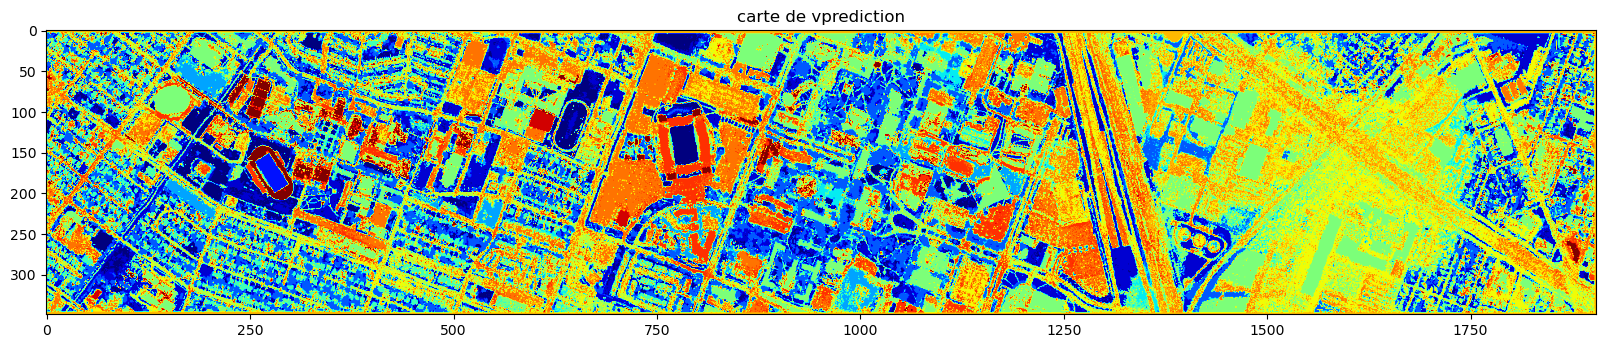

In [46]:
plt.figure(figsize=(20,5))
plt.title('carte de vprediction')
plt.imshow(prediction.reshape((349,1905)), cmap='jet')
plt.show()

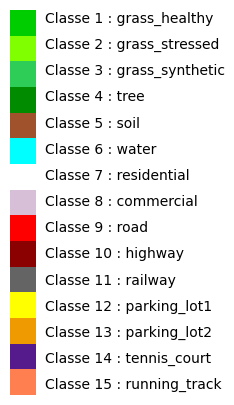

In [44]:
cls_rgb = []
for ii in groundtruth_info:
    cls_rgb.append(ii['class_color'])
cls_rgb = np.array(cls_rgb).reshape(15,-1,3)
plt.figure(figsize=(5,5))
plt.imshow(cls_rgb)
plt.axis('off')
for cls in range(15):
        plt.text(0.85,1.02*cls,'Classe %d : %s'%(cls+1,groundtruth_info[cls]['class_name']))
plt.show()